### Check pckls

In [1]:
import pickle

In [15]:
def print_args(model_args):
    with open(model_args, "rb") as f:
        model_args = pickle.load(f)
    for key, value in vars(model_args).items():
        print(str(key) + ": " + str(value))

In [29]:
argspckls = [r"published_models\published_models\main_model\args.pckl", r"published_models\published_models\hapmap_model\args.pckl"]
progpckls = [r"published_models\published_models\main_model\progress.pckl", r"published_models\published_models\hapmap_model\progress.pckl"]

print("Arguments:")
print("\n")
for args in argspckls:
    print("\n")
    print(args.split("\\")[-2])
    print("\n")
    print_args(args)
    print("\n")
    print("\n")

print("\n")
print("Progress:")
print("\n")

for prog in progpckls:
    print(prog.split("\\")[-2])
    print("\n")
    with open(prog, "rb") as f:
        prog = pickle.load(f)
    for key, value in (prog).items():
        print(str(key) + ": " + str(value))
    print("\n")
    print("\n")

Arguments:




main_model


exp: exp/agnostic/4classes_128gen/anc1Conv_winsize200_allrefs_newimpl
train_mixed: data/benet_generations/4classes/chm22/train1_128gen20/vcf_and_labels.h5
valid_mixed: data/benet_generations/4classes/chm22/val_128gen5/vcf_and_labels.h5
train_ref_panel: data/benet_generations/4classes/chm22/train2_0gen/vcf_and_labels.h5
valid_ref_panel: data/benet_generations/4classes/chm22/train2_0gen/vcf_and_labels.h5
num_epochs: 99999999
batch_size: 16
lr: 0.01
lr_decay: -1
update_every: 2
smoother: anc1conv
ref_pooling: topk
topk_k: 1
win_size: 200
win_stride: 200
dropout: -1
loss: BCE
resume: False
n_classes: 4
n_refs: 99999
comment: None






hapmap_model


exp: exp/agnostic/hapmap/4classes_128gen/anc1Conv_top130_winsize40_allrefs_newimpl
train_mixed: data/benet_generations/hapmap/4classes/train_128gen20/vcf_and_labels.h5
valid_mixed: data/benet_generations/hapmap/4classes/val_128gen5/vcf_and_labels.h5
train_ref_panel: data/benet_generations/hapmap/4classes/refpanel_0g

### %age Classifications

In [1]:
import pandas as pd

def analyze_lai_file(file_path):
    # Load the .lai file using pandas (assuming tab-separated format)
    df = pd.read_csv(file_path, sep='\t', comment='#')

    # Extract the 2nd and 3rd columns by index (index 1 and 2)
    data = df.iloc[:, 1:3].values.flatten()  # Flatten the values into a single array

    # Count occurrences of each integer
    counts = pd.Series(data).value_counts()

    # Map the integers to the corresponding labels
    labels = ["AFR", "AMR", "EAS", "EUR", "SAS"]
    counts = counts.sort_index()  # Ensure the counts match the label order (0 -> AFR, 1 -> AMR, etc.)

    # Calculate the total number of entries
    total_count = len(data)

    # Calculate the percentage of each integer's count
    percentages = (counts / total_count) * 100

    # Find the integer with the highest percentage
    max_percentage_int = percentages.idxmax()
    max_percentage_value = percentages.max()

    # Return the results: percentages, max integer, and its percentage
    return percentages, max_percentage_int, max_percentage_value

In [11]:
import matplotlib.pyplot as plt

def donut_plot_percentages(percentages):
    # Labels for the categories
    labels = ["AFR", "AMR", "EAS", "EUR", "SAS"]
    
    # Prepare data for the donut plot
    plot_counts = percentages.index
    plot_percentages = percentages.values
    plot_labels = [f"{label}: {percent:.2f}%" for label, percent in zip(labels, plot_percentages)]

    # Create the donut plot (pie chart with a hole in the middle)
    fig, ax = plt.subplots(figsize=(7, 7))
    wedges, texts, autotexts = ax.pie(plot_percentages, labels=plot_labels, autopct='', startangle=90,
                                      wedgeprops=dict(width=0.4))  # `width=0.4` creates the hole for the donut

    # Add title
    ax.set_title("Ancestry Distribution")

    # Display the plot
    plt.show()

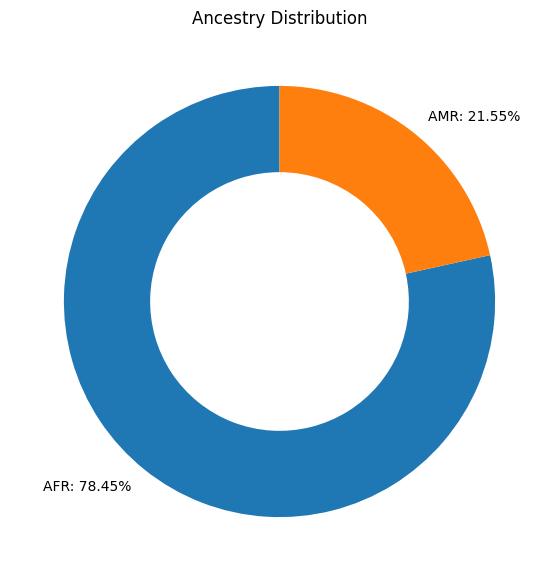

The integer with the highest percentage is AFR with 78.45%.


In [13]:
# Example usage:
file_path = r'H:\My Drive\Ancestry\SALAI-Net\user_8_hapmap_outputfiles\predictions.lai'
# file_path = r'H:\My Drive\Ancestry\SALAI-Net\prediction_human\predictions.lai'
labels = ["AFR", "AMR", "EAS", "EUR", "SAS"]

# Step 1: Analyze the file and get percentages and the maximum integer
percentages, max_int, max_percentage = analyze_lai_file(file_path)

# Step 2: Plot the donut chart using the percentages
donut_plot_percentages(percentages)

# Optionally, you can print out the maximum percentage integer:
print(f"The integer with the highest percentage is {labels[max_int]} with {max_percentage:.2f}%.")



### .

classes = ["AFR","AMR","EAS","EUR","SAS"]